# Gaussian Naive Bayes Classifier

### Términos útiles:

* Matriz de __covarianza__: $$ \mathbf{C} = \frac{1}{n-1} \sum^{n}_{k=1} (\mathbf{x_k - m})(\mathbf{x_k - m})^{\intercal} $$
* Distancia de __Mahalanobis__: ${| \mathbf{x - m}|}_{m}^{2} = (\mathbf{x_k - m})^{\intercal} \mathbf{C^{-1}} (\mathbf{x_k - m})$


## Regla decisión de Bayes de mínimo riesgo:
   Equivale a seleccionar la _clase_ con la mayor probabilidad _a posteriori_ cuando las decisiones tienen cero pérdidas y las decisiones incorrectas el mismo peso.
   
   
## Función de decisión para un clasificador de tipo _Gaussian Naive Bayes_:

$$h_i(\mathbf{x}) = - \frac{1}{2}(\mathbf{x - \mu_i})^{\intercal}\Sigma^{-1}_{i}(\mathbf{x - \mu_i})-\frac{d}{2}\ln{2\pi}-\frac{1}{2}\log{|\Sigma_{i}|}
+\ln{P(\omega_i)}$$

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (21, 10)

Populating the interactive namespace from numpy and matplotlib


(1500, 2)


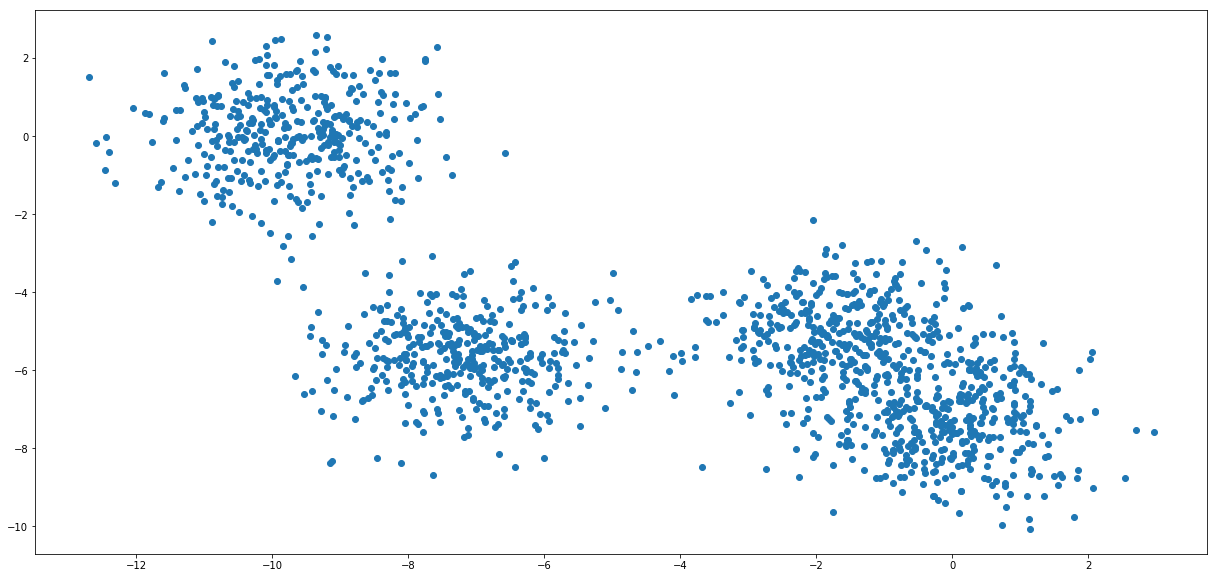

In [11]:
# Crear clases de calibración, usando sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

valores_clases, etiq_clases = make_blobs(1500, n_features=2, centers=4, random_state=9)
print(valores_clases.shape)

# Separar el conjunto de datos para hacer unos de entrenamiento y otros de prueba
x_entre, x_prueba, y_entre, y_prueba = train_test_split(valores_clases, etiq_clases, test_size=0.35, random_state=5, shuffle=False)
#print(set(x for x in etiq_clases))
# print(etiq_clases)
scatter(valores_clases[:, 0], valores_clases[:, 1])

In [12]:
def gaussian_nb(entrena, pred):
    h_disc = dict()
    total_puntos = sum([i.shape[1] for i in entrena.values()])
    
    # Una constante útil
    log_2pi = log(2.0*pi)
    
    for i, j in entrena.items():
        # Calcular la distancia a la media
        delta = pred - mean(j, axis=1)
        # Encontrar la matriz de covarianza
        matr_cov = cov(j)
        # Y su inversa
        inv_cov_matr = linalg.pinv(matr_cov)
        # Distancia de Mahalanobis
        m_dist = -0.5 * dot(dot(delta, inv_cov_matr), delta)
        # Restar el siguiente término, depende de la dimensión del arreglo
        m_dist += -0.5 * j.shape[0] * log_2pi
        # Calcular el determinante de la matriz de covarianza, restarlo
        # de la distancia acumulada
        eig_values, __ = linalg.eig(matr_cov)
        pseudo_det = product(eig_values[eig_values > 0])
        m_dist += -0.5 * log(pseudo_det)
        # Calcular la probabilidad a priori, y sumarla a la distancia
        a_priori = j.shape[1] / total_puntos
        m_dist += log(a_priori)
        # Agregar esta probabilidad al diccionario final
        h_disc[i] = m_dist
        
    # Devolver aquella clase que contiene la mayor probabilidad
    return max(h_disc, key=h_disc.get)

In [13]:
arreglados = sorted(zip(y_entre, x_entre), key=lambda pair: pair[0])
dicc_datos = dict()
for i in range(4):
    dicc_datos[i] = array([])

for l, k in dicc_datos.items():
    lista_vals = list()
    for m in range(2):
        list_arr_1 = array([])
        for i, j in arreglados:
            if i == l:
                list_arr_1 = append(list_arr_1, j[m])
        lista_vals.append(list_arr_1)

        dicc_datos[l] = stack(lista_vals, axis=0)

# print(dicc_datos)

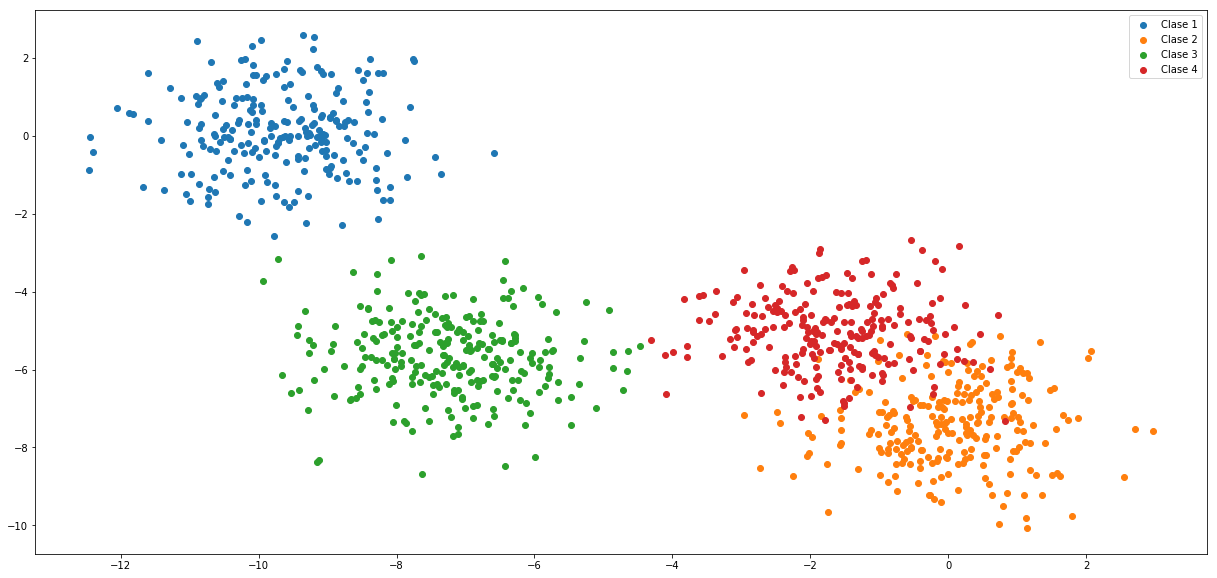

In [14]:
# Graficar las clases
for j, i in enumerate(dicc_datos.values()):
    scatter(*i, label=f'Clase {j+1}')
    
legend(loc='best')

In [15]:
# Clasificar
lista_prediccion = []
for i in x_prueba:
    lista_prediccion.append(gaussian_nb(dicc_datos, i))
    
#print(lista_prediccion)

In [16]:
# Crear un clasificador 'real' y comprobar los resultados con un reporte
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
    
sk_clf = GaussianNB()
sk_clf.fit(x_entre, y_entre)
y_true = sk_clf.predict(x_prueba)
print(sk_clf.score(x_entre, y_entre))
print(classification_report(y_prueba, y_true))

# Imprimir el reporte para mi clasificador
print(classification_report(y_prueba, lista_prediccion))

0.9661538461538461
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.92      0.94      0.93       131
           2       0.99      0.99      0.99       112
           3       0.93      0.92      0.93       139

   micro avg       0.96      0.96      0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.92      0.94      0.93       131
           2       0.99      0.99      0.99       112
           3       0.93      0.92      0.93       139

   micro avg       0.96      0.96      0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

   micro avg       0.81      0.81      0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899

Precisión media del clasificador: 0.8585746102449888


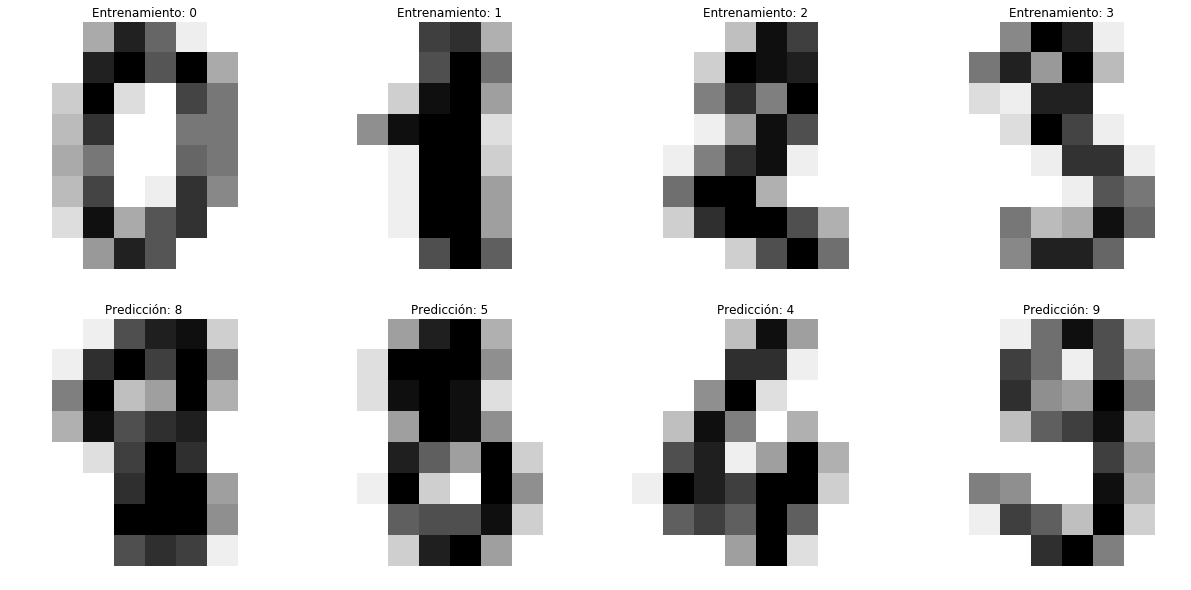

In [17]:
# Usar datos reales utilizando la implementación
# Tomado de https://tinyurl.com/yawllzn4
# Importar los datos
from sklearn import datasets

# Base de datos de dígitos
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    subplot(2, 4, index + 1)
    axis('off')
    imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title('Entrenamiento: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Crear el clasificador bayesiano de sklearn
digits_nb = GaussianNB()

# Entrenar el clasificador de sklearn con la primera mitad de los datos
digits_nb.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = digits_nb.predict(data[n_samples // 2:])

print(classification_report(expected, predicted))
print(f'Precisión media del clasificador: {digits_nb.score(data[:n_samples // 2], digits.target[:n_samples // 2])}')

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    subplot(2, 4, index + 5)
    axis('off')
    imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title('Predicción: %i' % prediction)

show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.85      0.85      0.85        91
           2       0.99      0.93      0.96        86
           3       0.95      0.95      0.95        91
           4       1.00      0.76      0.86        92
           5       0.94      0.88      0.91        91
           6       1.00      0.93      0.97        91
           7       0.91      0.96      0.93        89
           8       0.82      0.98      0.89        88
           9       0.78      0.92      0.85        92

   micro avg       0.91      0.91      0.91       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.91      0.91       899



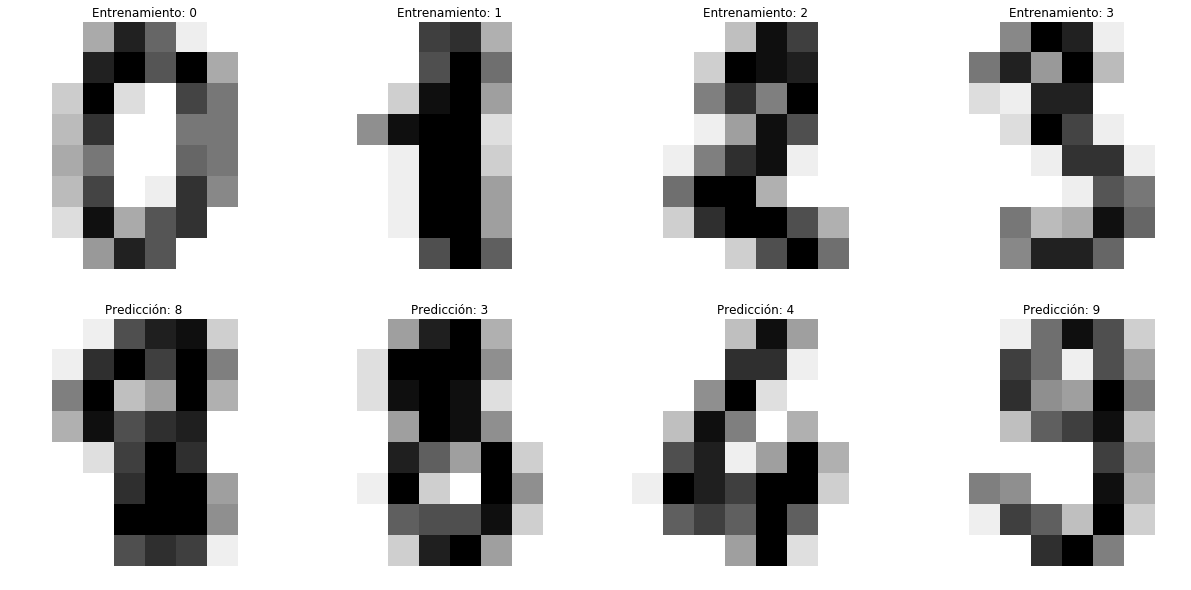

In [18]:
val_entren = data[:n_samples // 2]
etiq = digits.target[:n_samples // 2]
# print(val_entren.shape)
# print(etiq.shape)
ordenados = sorted(zip(etiq, val_entren), key=lambda pair: pair[0])
dicc_datos = dict()
for i in range(10):
    dicc_datos[i] = array([])

for l in dicc_datos.keys():
    lista_vals = list()
    for m in range(64): # Corresponde a la dimension
        list_arr_1 = array([])
        for i, j in ordenados:
            if i == l:
                list_arr_1 = append(list_arr_1, j[m])
        lista_vals.append(list_arr_1)

        dicc_datos[l] = stack(lista_vals, axis=0)
            
# for i in dicc_datos.values():
#     print(i.shape)
lista_digitos = array([])
for i in data[n_samples // 2:]:
    lista_digitos = append(lista_digitos, gaussian_nb(dicc_datos, i))

# print(expected)
# print(lista_digitos)
print(classification_report(expected, lista_digitos))

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    subplot(2, 4, index + 1)
    axis('off')
    imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title('Entrenamiento: %i' % label)

#print(classification_report(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], lista_digitos))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    subplot(2, 4, index + 5)
    axis('off')
    imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title('Predicción: %i' % prediction)

show()

## Conclusiones:

* Este método depende de la dimensión de los datos; entre _mayor_ sea la dimensión del _espacio de características_ este método es más eficiente.
* El procesamiento de los datos es fundamental para que el método funcione correctamente (y todos los demás clasificadores).
* En particular para el caso de un _likelihood_ normal, se debe utilizar la distribución normal multivariada, empleando correctamente las operaciones de **pseudoinversión** y **pseudodeterminante**.